<h1>Insurance Fraud Claims Detection</h1>


In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder

from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler

# TensorFlow and tf.keras
# import tensorflow as tf
# from tensorflow import keras
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import Dense
# from tensorflow.keras.layers import Dropout

# Performance Metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

from sklearn.decomposition import PCA
from sklearn.decomposition import TruncatedSVD


<h1>Reading CSV</h1>

In [2]:
# Read from CSV file
df = pd.read_csv('insurance_claims.csv')

<h2>Find Missing Values</h2>
No Missing Values

<h1>Feature Selection / Handling Categorical Variables</h1>

dropped `policy_number` (1000 distinct), `insured_zip` (995 distinct) and `insured_location` (1000 distinct)<br><br>
<i>too many distinct values so drop <br>
   total claim amt |
property claim |
injury claim

In [3]:
# drop _c39 column because its useless
df.drop(columns='_c39',inplace=True)

# drop cause too many distinct values
df.drop(columns=['policy_number', 'insured_zip', 'incident_location'],inplace=True)

In [4]:
# get object columns into list
df_col = list(df.select_dtypes(include=['object']).columns)

# creating instance of labelencoder
labelencoder = LabelEncoder()

# loop through df_col
for col in df_col:
    new_col = col + "_encode"
    # Assigning numerical values and storing in another column
    df[new_col] = labelencoder.fit_transform(df[col])


In [5]:
# drop not encoded columns
df.drop(columns=df_col, inplace=True)
df.shape

(1000, 36)

In [6]:
# drop correlated columns ('injury_claim', 'property_claim', 'vehicle_claim')
# correlation > 0.81 and the 3 cols == total claim
df.drop(columns=['injury_claim', 'property_claim', 'vehicle_claim'], inplace=True)
df.shape

(1000, 33)

In [7]:
df

,months_as_customer,age,policy_deductable,policy_annual_premium,umbrella_limit,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,...,collision_type_encode,incident_severity_encode,authorities_contacted_encode,incident_state_encode,incident_city_encode,property_damage_encode,police_report_available_encode,auto_make_encode,auto_model_encode,fraud_reported_encode
0,328,48,1000,1406.91,0,53300,0,5,1,1,...,3,0,4,4,1,2,2,10,1,1
1,228,42,2000,1197.22,5000000,0,0,8,1,0,...,0,1,4,5,5,0,0,8,12,1
2,134,29,2000,1413.14,5000000,35100,0,7,3,2,...,2,1,4,1,1,1,1,4,30,0
3,256,41,2000,1415.74,6000000,48900,-62400,5,1,1,...,1,0,4,2,0,0,1,3,34,1
4,228,44,1000,1583.91,6000000,66000,-46000,20,1,0,...,0,1,2,1,0,1,1,0,31,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,38,1000,1310.80,0,0,0,20,1,0,...,1,1,1,0,4,2,0,6,6,0
996,285,41,1000,1436.79,0,70900,0,23,1,2,...,2,0,1,4,3,2,0,13,28,0
997,130,34,500,1383.49,3000000,35100,0,4,3,2,...,3,1,4,0,0,0,2,11,19,0
998,458,62,2000,1356.92,5000000,0,0,2,1,0,...,2,0,3,1,0,0,2,1,5,0


In [8]:
df_x = df.drop(columns=["fraud_reported_encode"])
df_x

,months_as_customer,age,policy_deductable,policy_annual_premium,umbrella_limit,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,...,incident_type_encode,collision_type_encode,incident_severity_encode,authorities_contacted_encode,incident_state_encode,incident_city_encode,property_damage_encode,police_report_available_encode,auto_make_encode,auto_model_encode
0,328,48,1000,1406.91,0,53300,0,5,1,1,...,2,3,0,4,4,1,2,2,10,1
1,228,42,2000,1197.22,5000000,0,0,8,1,0,...,3,0,1,4,5,5,0,0,8,12
2,134,29,2000,1413.14,5000000,35100,0,7,3,2,...,0,2,1,4,1,1,1,1,4,30
3,256,41,2000,1415.74,6000000,48900,-62400,5,1,1,...,2,1,0,4,2,0,0,1,3,34
4,228,44,1000,1583.91,6000000,66000,-46000,20,1,0,...,3,0,1,2,1,0,1,1,0,31
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,38,1000,1310.80,0,0,0,20,1,0,...,2,1,1,1,0,4,2,0,6,6
996,285,41,1000,1436.79,0,70900,0,23,1,2,...,2,2,0,1,4,3,2,0,13,28
997,130,34,500,1383.49,3000000,35100,0,4,3,2,...,0,3,1,4,0,0,0,2,11,19
998,458,62,2000,1356.92,5000000,0,0,2,1,0,...,2,2,0,3,1,0,0,2,1,5


## Correlation with target var

<AxesSubplot:>

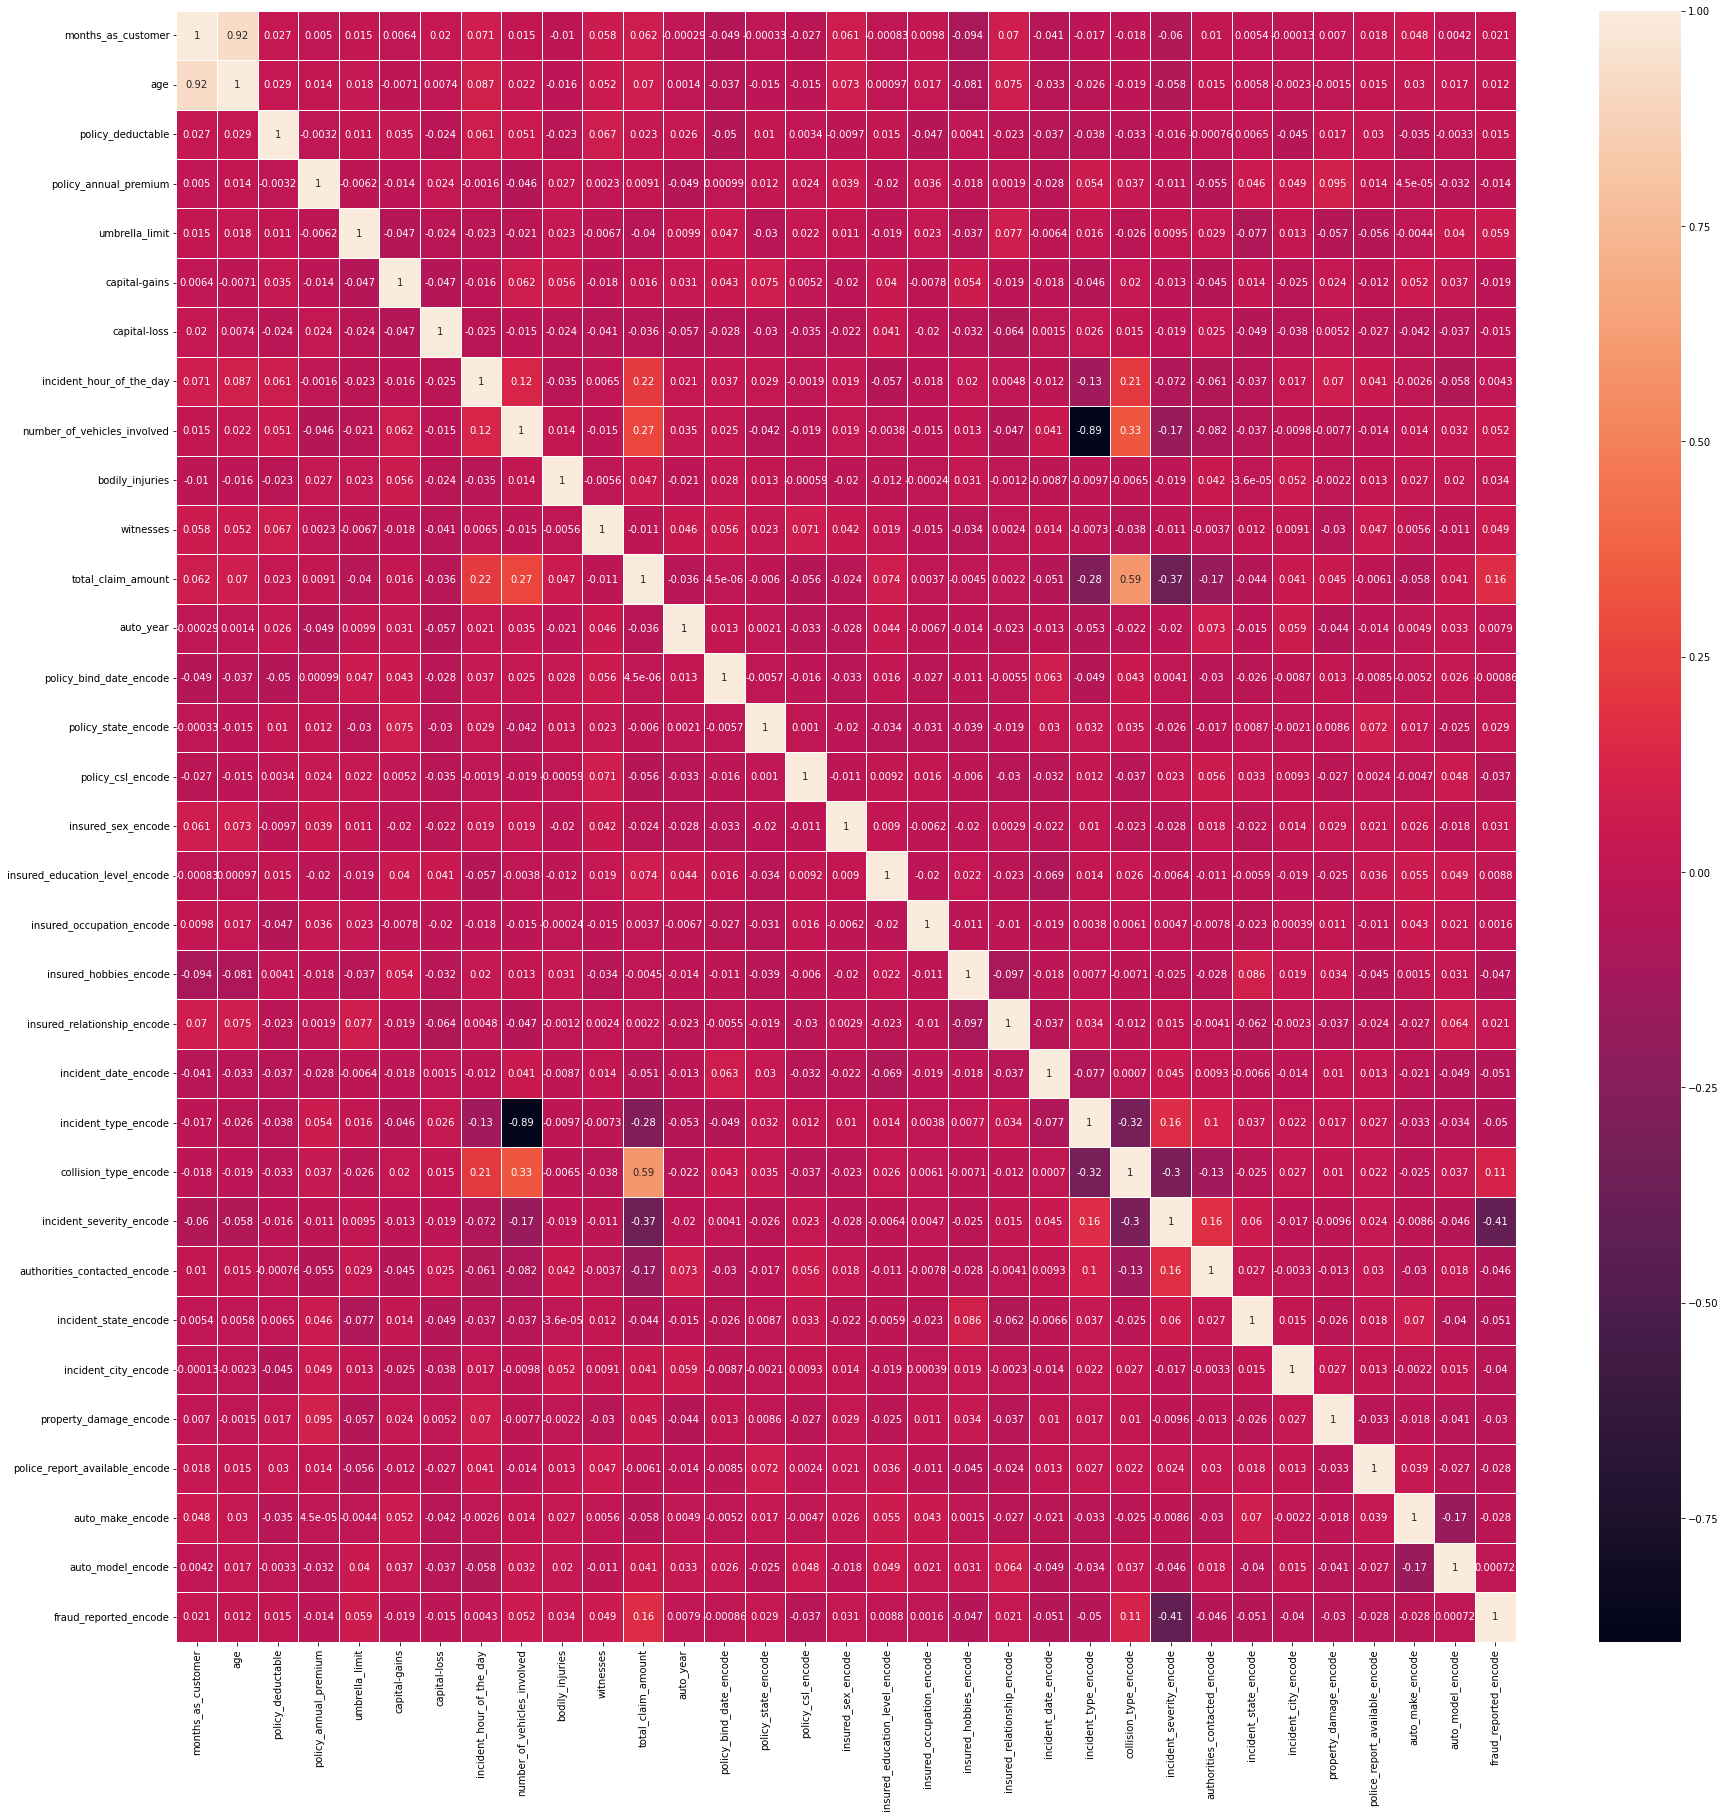

In [9]:
plt.figure(figsize=(30,30))
corr=df.corr()
sns.heatmap(data=corr,annot=True,fmt='.2g',linewidth=1)

In [10]:
X = df[['umbrella_limit', 'number_of_vehicles_involved', 'incident_date_encode', 'incident_type_encode', 'collision_type_encode', 'incident_severity_encode', 'incident_state_encode', 'total_claim_amount']]

## Check for multicollinearity

In [11]:
df2 = df[['umbrella_limit', 'number_of_vehicles_involved', 'total_claim_amount', 'incident_date_encode', 'incident_type_encode', 'collision_type_encode', 'incident_severity_encode', 'incident_state_encode']]

col = ['umbrella_limit', 'number_of_vehicles_involved', 'total_claim_amount', 'incident_date_encode', 'incident_type_encode', 'collision_type_encode', 'incident_severity_encode', 'incident_state_encode']
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif["features"] = col
vif["vif_Factor"] = [variance_inflation_factor(df2.values, i) for i in range(df2.shape[1])]
vif

,features,vif_Factor
0,umbrella_limit,1.226764
1,number_of_vehicles_involved,7.160980
2,total_claim_amount,7.628326
3,incident_date_encode,3.614430
4,incident_type_encode,3.323087
5,collision_type_encode,5.629825
6,incident_severity_encode,2.800091
7,incident_state_encode,3.161188


## Scale

In [42]:
data_to_scale = df[['umbrella_limit', 'number_of_vehicles_involved', 'total_claim_amount']]
scaler = StandardScaler()

data_scaled = scaler.fit_transform(data_to_scale)
data_scaled
df[['umbrella_limit_scaled', 'number_of_vehicles_involved_scaled', 'total_claim_amount_scaled']] = data_scaled
df

,months_as_customer,age,policy_deductable,policy_annual_premium,umbrella_limit,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,...,incident_state_encode,incident_city_encode,property_damage_encode,police_report_available_encode,auto_make_encode,auto_model_encode,fraud_reported_encode,umbrella_limit_scaled,number_of_vehicles_involved_scaled,total_claim_amount_scaled
0,328,48,1000,1406.91,0,53300,0,5,1,1,...,4,1,2,2,10,1,1,-0.479476,-0.823865,0.714257
1,228,42,2000,1197.22,5000000,0,0,8,1,0,...,5,5,0,0,8,12,1,1.697980,-0.823865,-1.807312
2,134,29,2000,1413.14,5000000,35100,0,7,3,2,...,1,1,1,1,4,30,0,1.697980,1.140056,-0.686362
3,256,41,2000,1415.74,6000000,48900,-62400,5,1,1,...,2,0,0,1,3,34,1,2.133471,-0.823865,0.403135
4,228,44,1000,1583.91,6000000,66000,-46000,20,1,0,...,1,0,1,1,0,31,0,2.133471,-0.823865,-1.753121
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,38,1000,1310.80,0,0,0,20,1,0,...,0,4,2,0,6,6,0,-0.479476,-0.823865,1.305049
996,285,41,1000,1436.79,0,70900,0,23,1,2,...,4,3,2,0,13,28,0,-0.479476,-0.823865,2.111466
997,130,34,500,1383.49,3000000,35100,0,4,3,2,...,0,0,0,2,11,19,0,0.826998,1.140056,0.558507
998,458,62,2000,1356.92,5000000,0,0,2,1,0,...,1,0,0,2,1,5,0,1.697980,-0.823865,-0.219110


In [43]:
X = df[['umbrella_limit_scaled', 'number_of_vehicles_involved_scaled', 'incident_date_encode', 'incident_type_encode', 'collision_type_encode', 'incident_severity_encode', 'incident_state_encode', 'total_claim_amount_scaled']]
y = df[['fraud_reported_encode']]


-----
<h2> SMOTE </h2> <i>https://machinelearningmastery.com/smote-oversampling-for-imbalanced-classification/

In [44]:
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline
from imblearn.under_sampling import RandomUnderSampler
# define pipeline
# random_state is removed to test the performace of the model, but can be added back after finding the best

over_4060 = SMOTE(sampling_strategy=0.4) 
# oversample the minority class to have 40 percent the number of examples of the majority class

over_5050 = SMOTE() 
# oversample the minority class to have 50 percent the number of examples of the majority class

# !!! Should not be undersampling because of insufficient data points
# under = RandomUnderSampler(sampling_strategy=0.4)
# random undersampling to reduce the number of examples in the majority class to have 50 percent more than the minority class

# steps = [('o', over), ('u', under)]
# pipeline = Pipeline(steps=steps)
# transform the dataset

X4060, y4060 = over_4060.fit_resample(X, y)

X5050, y5050 = over_5050.fit_resample(X, y)


------
<h2> Split to training and testing set

In [47]:
x_train, x_test, y_train, y_test = train_test_split(X5050, y5050, test_size=0.2, random_state=42)

## K-nn

Reference to find optimal k: https://towardsdatascience.com/how-to-find-the-optimal-value-of-k-in-knn-35d936e554eb

Derive a plot between error rate and K denoting values in a defined range. Then choose the K value as having a minimum error rate.

C:\Users\andre\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\andre\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\andre\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\andre\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_sam

Minimum error:- 0.48717161528003156 at K = 24


C:\Users\andre\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\andre\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\andre\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\andre\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_sam

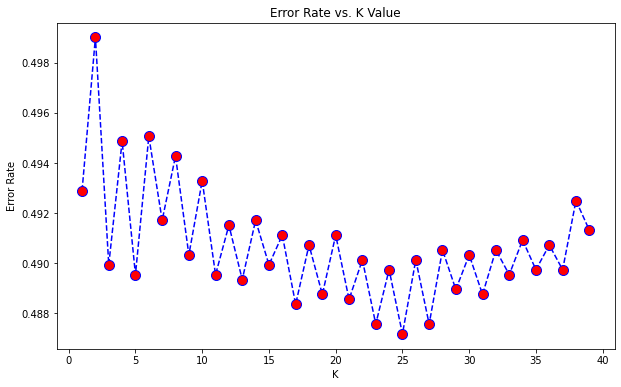

In [48]:
error_rate = []
for i in range(1,40):
     knn = KNeighborsClassifier(n_neighbors=i)
     knn.fit(x_train,y_train)
     y_pred = knn.predict(x_test)
     error_rate.append(np.mean(np.array(y_pred) != np.array(y_test)))

plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', 
         marker='o',markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')
print("Minimum error:-",min(error_rate),"at K =",error_rate.index(min(error_rate)))

In [49]:
df_errorRate = pd.DataFrame(error_rate, columns=["Error Rate"])
df_errorRate.index = np.arange(1, len(df_errorRate) + 1)
df_errorRate.sort_values(by=['Error Rate'])

,Error Rate
25,0.487172
23,0.487566
27,0.487566
17,0.488356
21,0.488553
19,0.488750
31,0.488750
29,0.488948
13,0.489343
11,0.489540


visualize the plot between accuracy and K value.

C:\Users\andre\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\andre\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\andre\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\andre\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_sam

Maximum accuracy:- 0.7913907284768212 at K = 0


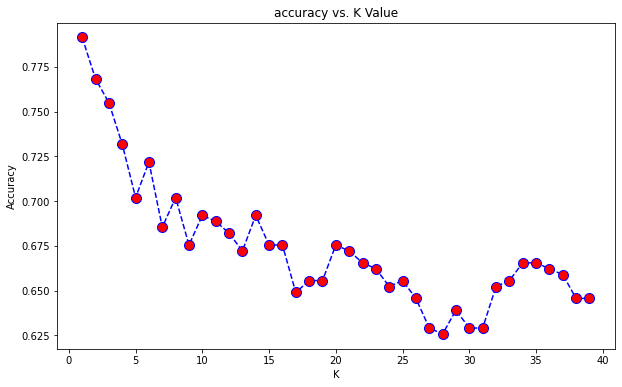

In [50]:
acc = []
# Will take some time
from sklearn import metrics
for i in range(1,40):
    neigh = KNeighborsClassifier(n_neighbors = i).fit(x_train,y_train)
    yhat = neigh.predict(x_test)
    acc.append(metrics.accuracy_score(y_test, yhat))
    
plt.figure(figsize=(10,6))
plt.plot(range(1,40),acc,color = 'blue',linestyle='dashed', 
         marker='o',markerfacecolor='red', markersize=10)
plt.title('accuracy vs. K Value')
plt.xlabel('K')
plt.ylabel('Accuracy')
print("Maximum accuracy:-",max(acc),"at K =",acc.index(max(acc)))

In [51]:
df_accuracy = pd.DataFrame(acc, columns=["Accuracy"])
df_accuracy.index = np.arange(1, len(df_accuracy) + 1)
df_accuracy.sort_values(by=['Accuracy'])

,Accuracy
28,0.625828
27,0.629139
30,0.629139
31,0.629139
29,0.639073
38,0.645695
26,0.645695
39,0.645695
17,0.649007
24,0.652318


## Get the k with decent error rate and accuracy: k = 5

In [59]:
model = KNeighborsClassifier(n_neighbors=5) 
model.fit(x_train,y_train)
y_pred = model.predict(x_test)

# Find the confusion matrix of the result
cm = metrics.confusion_matrix(y_pred, y_test)
print(cm)

# Find the accuracy and F1 score of the result
asr = metrics.accuracy_score(y_pred, y_test)
f1 = metrics.f1_score(y_pred, y_test)
precision = metrics.precision_score(y_pred, y_test)
recall = metrics.recall_score(y_pred, y_test)


[[ 75  23]
 [ 67 137]]


C:\Users\andre\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


In [60]:
print('Accuracy:', asr)
print('F1 Score:', f1)
print('Precision:', precision)
print('Recall:', recall)

Accuracy: 0.7019867549668874
F1 Score: 0.7527472527472526
Precision: 0.85625
Recall: 0.6715686274509803


## Bagging (with kNN)

In [61]:
#For Bagging implementation
from sklearn.ensemble import BaggingClassifier

In [62]:
#Create the kNN base classifier
knn = KNeighborsClassifier(n_neighbors=5)

#Create the Bagging classifier. Default base classifiers is Decision Tree. 
# - n_estimator is the number of base classifiers (i.e. weak learners)
model = BaggingClassifier(base_estimator = knn, n_estimators=50)

#Fit the training feature Xs and training label Ys
model.fit(x_train, y_train)

C:\Users\andre\anaconda3\lib\site-packages\sklearn\ensemble\_bagging.py:719: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


BaggingClassifier(base_estimator=KNeighborsClassifier(), n_estimators=50)

In [63]:
#Use the trained model to predict the test data
y_pred = model.predict(x_test)

# Find the confusion matrix of the result
cm = metrics.confusion_matrix(y_pred, y_test)
print(cm)

# Find the accuracy and F1 score of the result
asr = metrics.accuracy_score(y_pred, y_test)
f1 = metrics.f1_score(y_pred, y_test)
precision = metrics.precision_score(y_pred, y_test)
recall = metrics.recall_score(y_pred, y_test)


print('Accuracy:', asr)
print('F1 Score:', f1)
print('Precision:', precision)
print('Recall:', recall)

[[ 80  23]
 [ 62 137]]
Accuracy: 0.7185430463576159
F1 Score: 0.7632311977715877
Precision: 0.85625
Recall: 0.6884422110552764


## Boosting

Reference: https://stackoverflow.com/questions/18306416/adaboostclassifier-with-different-base-learners

Unable to perform AdaBoost with KNN as estimator since it does not support sample_weight

In [64]:
#For AdaBoost implementation
from sklearn.ensemble import AdaBoostClassifier

In [65]:
knn = KNeighborsClassifier(n_neighbors=11)
model = AdaBoostClassifier(n_estimators=50,learning_rate=1, estimator=knn, algorithm='SAMME')
# model.fit(x_train, np.ravel(y_train.to_numpy()))
model.fit(x_train.to_numpy(), y_train)



TypeError: __init__() got an unexpected keyword argument 'estimator'